In [16]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Enable inline plotting
%matplotlib inline
# Check the contents of the directory
print(os.listdir(r"C:\Users\Dell.com\Desktop\ml\project 4"))


['cat_dog.ipynb', 'test1', 'train']


In [18]:
# Define constants
NUM_CLASSES = 2
CHANNELS = 3  # channel for color RGB
IMG_SIZE = 224
TRAIN_DIR = r'C:\Users\Dell.com\Desktop\ml\project 4\train'
TEST_DIR = r'C:\Users\Dell.com\Desktop\ml\project 4\test1'
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100
BATCH_SIZE_TESTING = 1

In [24]:
train_filenames = os.listdir(TRAIN_DIR)
cat = [x for x in train_filenames if x[:3] == 'cat']
dog = [x for x in train_filenames if x[:3] == 'dog']

print("training data size for cat is : "+str(len(cat)))
print("training data size for dog is : "+str(len(dog)))
print("test data size is : "+str(len(os.listdir(TEST_DIR))))

training data size for cat is : 12500
training data size for dog is : 12500
test data size is : 12500


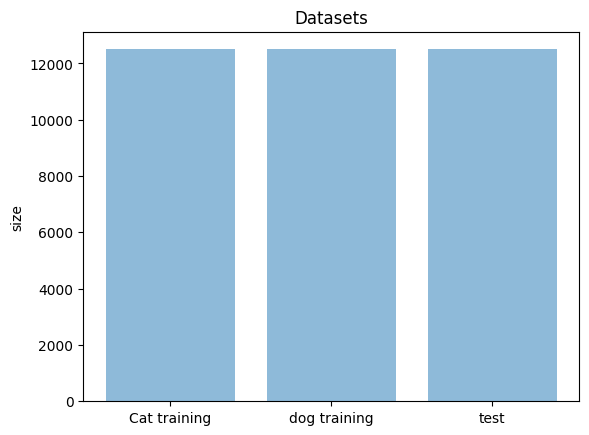

In [26]:
objects = ('Cat training', 'dog training', 'test')
y_pos = np.arange(len(objects))
performance = [len(cat),len(dog),len(os.listdir(TEST_DIR))]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('size')
plt.title('Datasets')
 
plt.show()

In [27]:
mytrain, myvalid = train_test_split(train_filenames, test_size=0.2,random_state=10)
print (len(mytrain), len(myvalid))

20000 5000


In [28]:
train_cat = [x for x in mytrain if x[:3] == 'cat']
train_dog = [x for x in mytrain if x[:3] == 'dog']
valid_cat = [x for x in myvalid if x[:3] == 'cat']
valid_dog = [x for x in myvalid if x[:3] == 'dog']
x = ['train_cat', 'train_dog', 'valid_cat', 'valid_dog']
y = [len(train_cat), len(train_dog), len(valid_cat), len(valid_dog)]
print("cat training size : "+str(len(train_cat)))
print("dog training size : "+str(len(train_dog)))

print("cat validation size : "+str(len(valid_cat)))
print("dog validation size : "+str(len(valid_dog)))

cat training size : 10048
dog training size : 9952
cat validation size : 2452
dog validation size : 2548


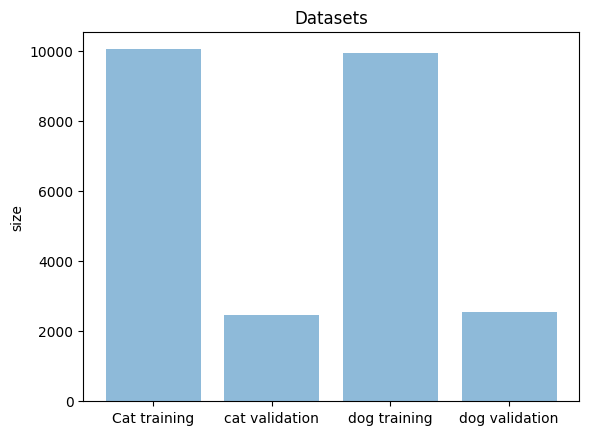

In [29]:
objects = ('Cat training','cat validation' ,'dog training', 'dog validation')
y_pos = np.arange(len(objects))
performance = [len(train_cat),len(valid_cat),len(train_dog),len(valid_dog)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('size')
plt.title('Datasets')
 
plt.show()

In [31]:
import shutil
# Define directories
TRAIN_DIR = r'C:\Users\Dell.com\Desktop\ml\project 4\train'
TRAINING_FOLDER = r'C:\Users\Dell.com\Desktop\ml\project 4\trainvalidfull4keras\train'
VALIDATION_FOLDER = r'C:\Users\Dell.com\Desktop\ml\project 4\trainvalidfull4keras\valid'

# Ensure training and validation folders exist
if not os.path.exists(TRAINING_FOLDER):
    os.makedirs(TRAINING_FOLDER)
    os.makedirs(os.path.join(TRAINING_FOLDER, 'cats'))
    os.makedirs(os.path.join(TRAINING_FOLDER, 'dogs'))
    
if not os.path.exists(VALIDATION_FOLDER):
    os.makedirs(VALIDATION_FOLDER)
    os.makedirs(os.path.join(VALIDATION_FOLDER, 'cats'))
    os.makedirs(os.path.join(VALIDATION_FOLDER, 'dogs'))

# List all images in the training directory
all_images = os.listdir(TRAIN_DIR)
cat_images = [img for img in all_images if 'cat' in img]
dog_images = [img for img in all_images if 'dog' in img]

# Split images for training and validation
split_ratio = 0.8
split_index_cat = int(len(cat_images) * split_ratio)
split_index_dog = int(len(dog_images) * split_ratio)

train_cat = cat_images[:split_index_cat]
val_cat = cat_images[split_index_cat:]
train_dog = dog_images[:split_index_dog]
val_dog = dog_images[split_index_dog:]

# Create symlinks or copy files for training cats and dogs
for filename in train_cat:
    src = os.path.join(TRAIN_DIR, filename)
    dst = os.path.join(TRAINING_FOLDER, 'cats', filename)
    shutil.copy(src, dst)

for filename in train_dog:
    src = os.path.join(TRAIN_DIR, filename)
    dst = os.path.join(TRAINING_FOLDER, 'dogs', filename)
    shutil.copy(src, dst)

# Create symlinks or copy files for validation cats and dogs
for filename in val_cat:
    src = os.path.join(TRAIN_DIR, filename)
    dst = os.path.join(VALIDATION_FOLDER, 'cats', filename)
    shutil.copy(src, dst)

for filename in val_dog:
    src = os.path.join(TRAIN_DIR, filename)
    dst = os.path.join(VALIDATION_FOLDER, 'dogs', filename)
    shutil.copy(src, dst)

print("Folders and files for training and validation have been created.")


Folders and files for training and validation have been created.


In [32]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                 

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/5


625/625 [==============================] - 675s 1s/step - loss: 0.6896 - accuracy: 0.6116 - val_loss: 0.6072 - val_accuracy: 0.6616
Epoch 2/5
625/625 [==============================] - 255s 407ms/step - loss: 0.5843 - accuracy: 0.6956 - val_loss: 0.5106 - val_accuracy: 0.7512
Epoch 3/5
625/625 [==============================] - 256s 409ms/step - loss: 0.5243 - accuracy: 0.7428 - val_loss: 0.4727 - val_accuracy: 0.7750
Epoch 4/5
625/625 [==============================] - 256s 409ms/step - loss: 0.4806 - accuracy: 0.7712 - val_loss: 0.4446 - val_accuracy: 0.7992
Epoch 5/5
625/625 [==============================] - 257s 411ms/step - loss: 0.4509 - accuracy: 0.7895 - val_loss: 0.4226 - val_accuracy: 0.8042


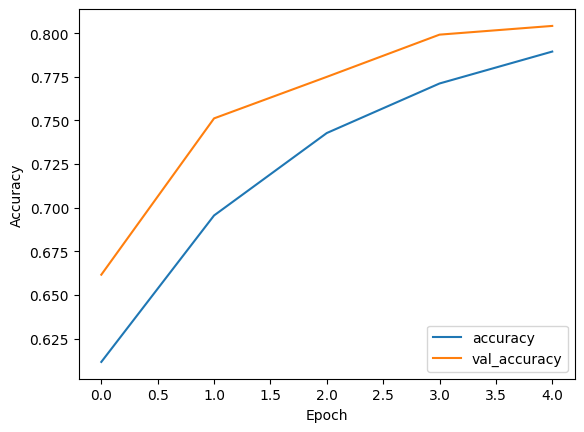

In [34]:
# Initialize ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_set = train_datagen.flow_from_directory(
    TRAINING_FOLDER,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Flow validation images in batches using test_datagen generator
validation_set = test_datagen.flow_from_directory(
    VALIDATION_FOLDER,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=5,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

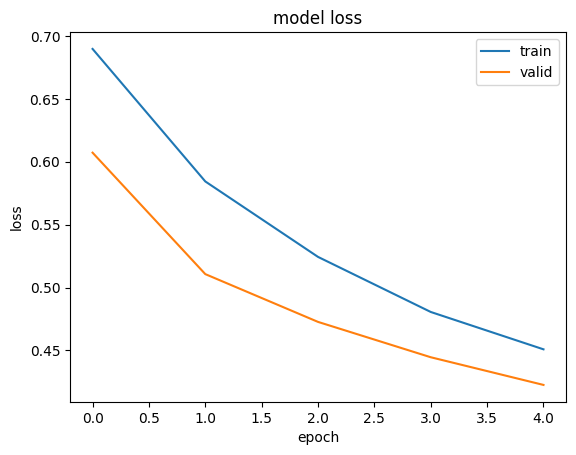

In [36]:
  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [40]:
# Save the model
model.save('cats_and_dogs_classifier.h5')
print("Model training completed and saved.")


Model training completed and saved.


In [43]:
# Load some test images and visualize predictions
import random
from tensorflow.keras.preprocessing import image

# Load random images from the validation set
validation_cat_files = os.listdir(os.path.join(VALIDATION_FOLDER, 'cats'))
validation_dog_files = os.listdir(os.path.join(VALIDATION_FOLDER, 'dogs'))

test_images = []
test_labels = []

for i in range(3):
    cat_img_path = os.path.join(VALIDATION_FOLDER, 'cats', random.choice(validation_cat_files))
    dog_img_path = os.path.join(VALIDATION_FOLDER, 'dogs', random.choice(validation_dog_files))
    
    test_images.append(cat_img_path)
    test_labels.append(0)
    
    test_images.append(dog_img_path)
    test_labels.append(1)

1/1 [==============================] - 0s 88ms/step


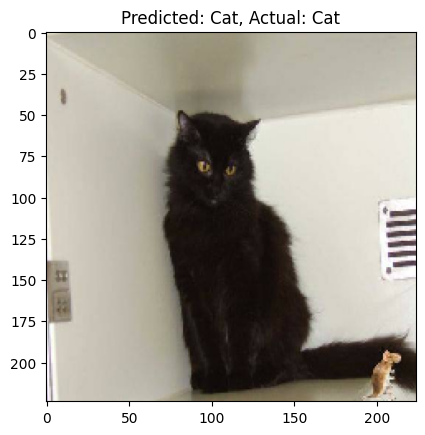

1/1 [==============================] - 0s 27ms/step


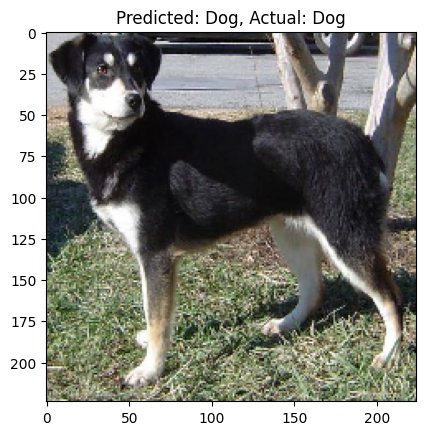

1/1 [==============================] - 0s 23ms/step


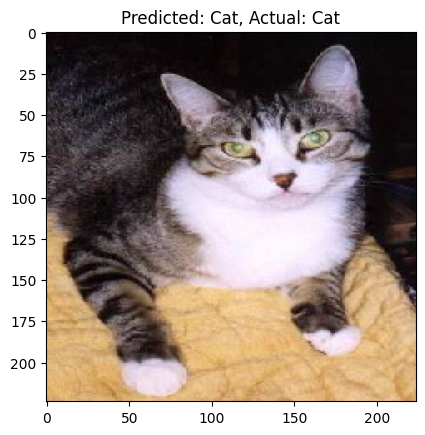

1/1 [==============================] - 0s 25ms/step


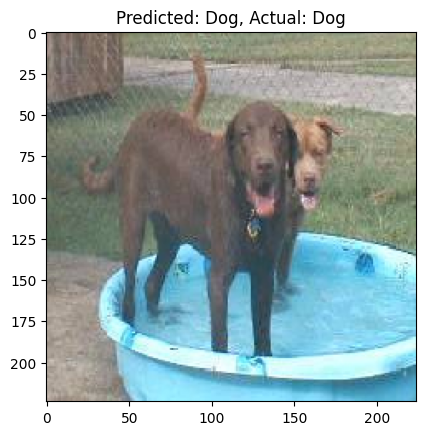

1/1 [==============================] - 0s 23ms/step


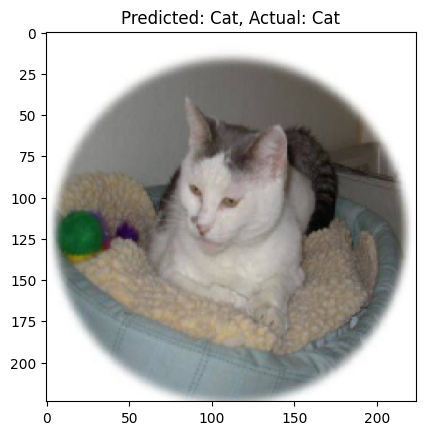

1/1 [==============================] - 0s 26ms/step


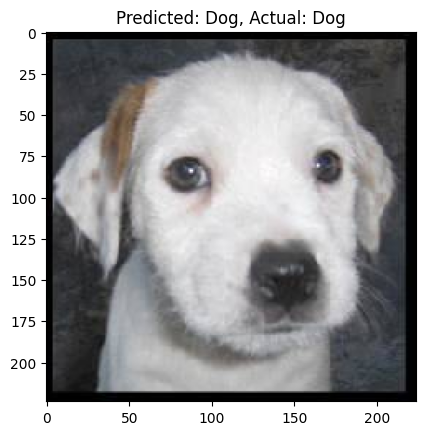

In [44]:
# Preprocess and predict
for img_path, label in zip(test_images, test_labels):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    
    plt.imshow(img)
    plt.title(f"Predicted: {'Dog' if prediction[0][0] > 0.5 else 'Cat'}, Actual: {'Dog' if label == 1 else 'Cat'}")
    plt.show()

157/157 [==============================] - 12s 75ms/step
Classification Report
              precision    recall  f1-score   support

         Cat       0.50      0.47      0.48      2500
         Dog       0.50      0.54      0.52      2500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



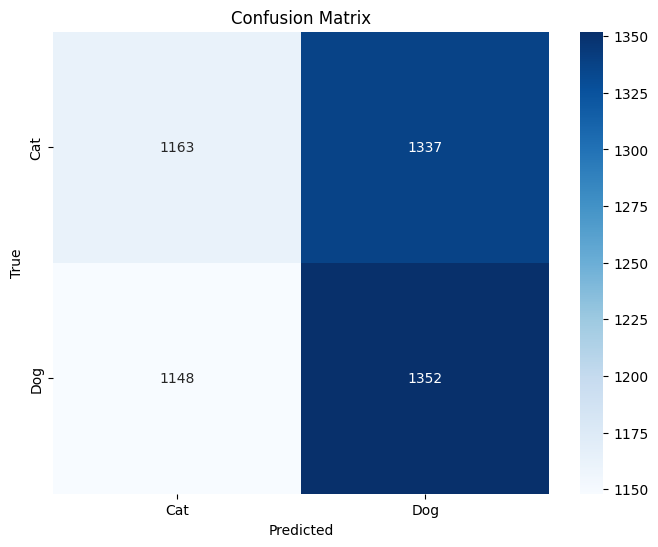

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get true labels and predictions for the validation set
validation_steps = len(validation_set)
Y_pred = model.predict(validation_set, validation_steps)
y_pred = np.round(Y_pred).astype(int).flatten()

# Get true labels
y_true = validation_set.classes

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 26ms/step


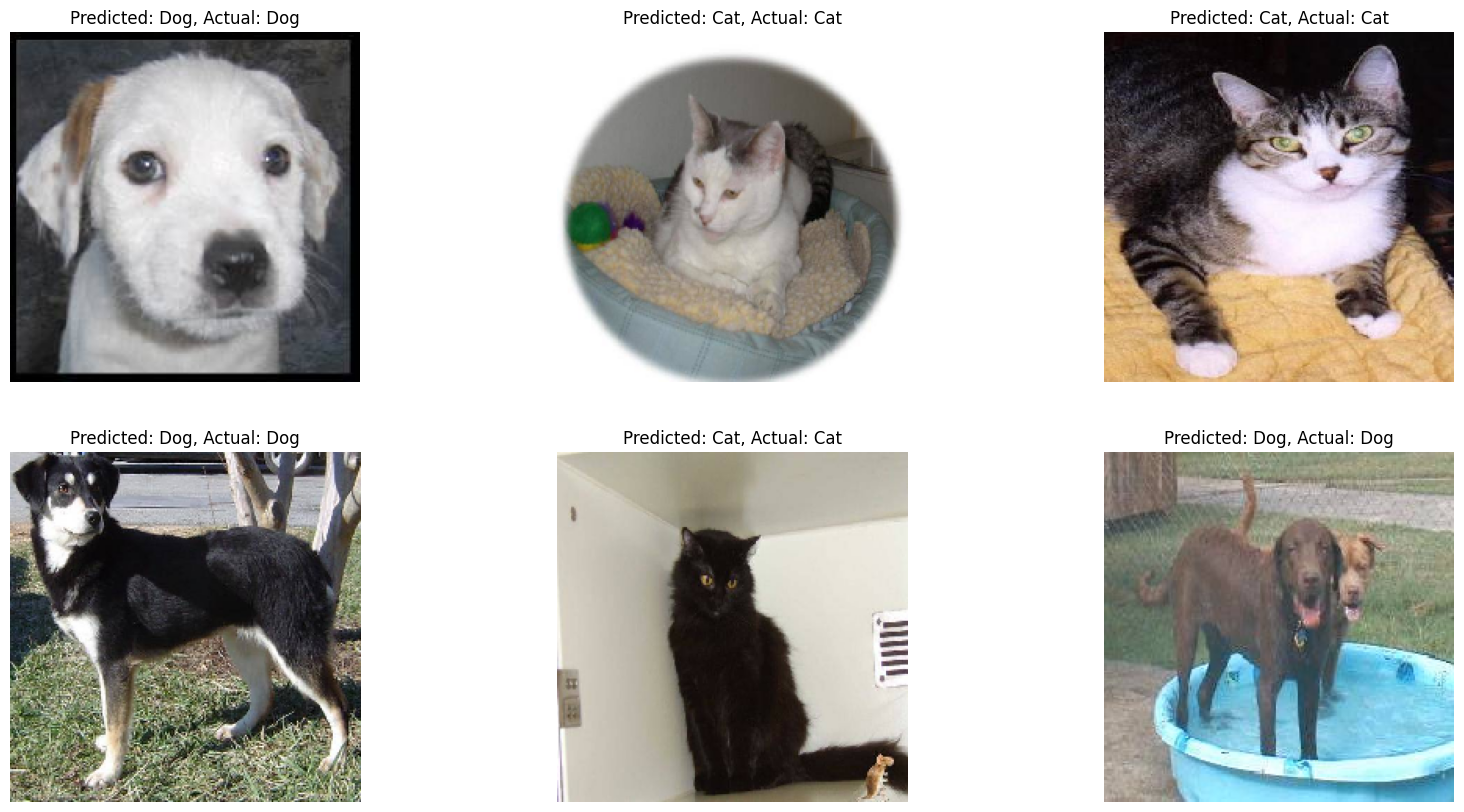

In [46]:
# Function to visualize predictions with true labels
def visualize_predictions(images, labels, predictions, num_images=6):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        img = image.load_img(images[i], target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"Predicted: {'Dog' if predictions[i] > 0.5 else 'Cat'}, Actual: {'Dog' if labels[i] == 1 else 'Cat'}")
        plt.axis('off')
    plt.show()

# Get random images from the validation set
random_indices = random.sample(range(len(test_images)), 6)
sample_images = [test_images[i] for i in random_indices]
sample_labels = [test_labels[i] for i in random_indices]

# Preprocess images and get predictions
sample_predictions = []
for img_path in sample_images:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    sample_predictions.append(prediction[0][0])

# Visualize predictions
visualize_predictions(sample_images, sample_labels, sample_predictions)


In [51]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_set, steps=len(validation_set))

# Print the validation accuracy
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


157/157 [==============================] - 11s 72ms/step - loss: 0.4226 - accuracy: 0.8042
Validation Accuracy: 80.42%
